# INESTIGATING THE FEATURES

In [5]:
%run code/import_libs.py
%run code/functions_v1.4.py
%run code/Build_Forms_v1.4.py
%run code/initial_data_prep.py

import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 30)
pd.options.display.float_format = '{:,}'.format


#FILTER
df=df[~df["grade"].isin([3,4,5])].copy()

# Grouping by different factors

In [6]:
df['year_of_sale']=df['date'].apply(lambda x: str.split(x,'/')[2]).astype(int)

avg_sq_df=df[(df['sqft_living'] >= 1850) & (df['sqft_living'] <= 2050)].copy()
avg_grade_df=df[df['grade'].isin([7,8])]
avg_sq_grade_df=avg_sq_df[avg_sq_df['grade'].isin([7,8])]
avg_grade_zip_df=avg_grade_df[avg_grade_df['zipcode'].isin([98011,98014,98024])]

by_zipcode_df=df.groupby('zipcode').mean().reset_index()[['zipcode','price','price_per_sqft']].sort_values(by='price', \
                                                                                                    ascending=False)
by_zipcode_df['price']=by_zipcode_df['price'].round()
by_zipcode_df['price_per_sqft']=by_zipcode_df['price_per_sqft'].round()

quant_low= by_zipcode_df['price_per_sqft'].quantile(0.40)
quant_high= by_zipcode_df['price_per_sqft'].quantile(0.60)
quant_lowAvg=by_zipcode_df[by_zipcode_df['price_per_sqft']>quant_low] 
quantileAvg_zips=quant_lowAvg[by_zipcode_df['price_per_sqft'] < quant_high]

avg_zipcode_df=df[df['zipcode'].isin(quantileAvg_zips['zipcode'])]
avg_sq_zip_df=avg_sq_df[avg_sq_df['zipcode'].isin(quantileAvg_zips['zipcode'])]

by_grade_df=avg_sq_df.groupby('grade').mean().reset_index()[['grade','price','price_per_sqft']].sort_values(by='price_per_sqft', \
                                                                                                       ascending=False)


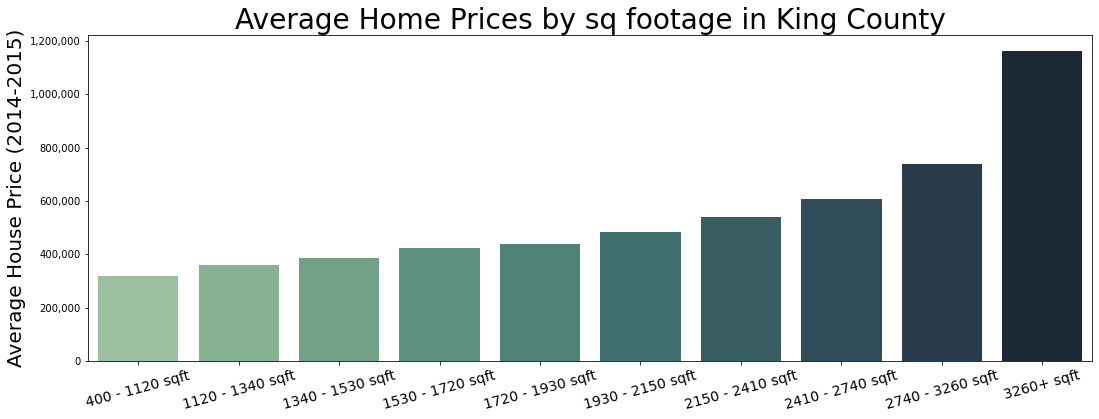

In [7]:
size_labels = np.array(["400 - 1120 sqft","1120 - 1340 sqft","1340 - 1530 sqft","1530 - 1720 sqft","1720 - 1930 sqft","1930 - 2150 sqft","2150 - 2410 sqft",\
               "2410 - 2740 sqft","2740 - 3260 sqft","3260+ sqft"])

df['sqft_living_bins']=pd.qcut(df['sqft_living'],q=10, labels=size_labels)

by_size_df=df.groupby('sqft_living_bins').mean().reset_index()[['sqft_living_bins','price','price_per_sqft']].sort_values(by='price', \
                                                                                                       ascending=False)
by_size_df['price']=by_size_df['price'].round()
by_size_df['price_per_sqft']=by_size_df['price_per_sqft'].round()


fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='price', y='price', data=by_size_df,
            order=by_size_df.sort_values('price')['price'], palette="ch:r=-.5,l=.7")


ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title("Average Home Prices by sq footage in King County", size=28)
ax.set_ylabel("Average House Price (2014-2015)", size=20)
ax.set_xlabel("", size=24)


ax.set_xticklabels(size_labels, fontsize=14, rotation=15 )

fig.savefig('images/by_size.png')




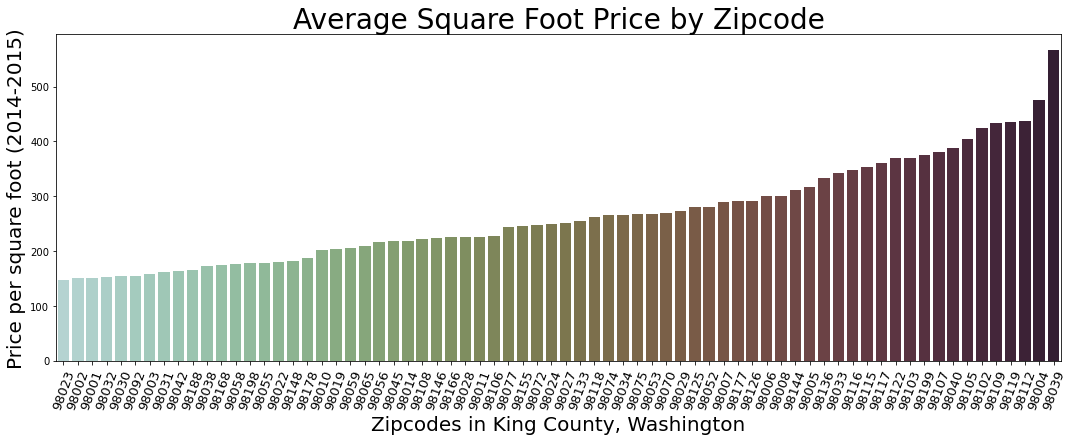

In [8]:
by_zipcode_df=df.groupby('zipcode').mean().reset_index()[['zipcode','price','price_per_sqft']].sort_values(by='price', \
                                                                                                       ascending=False)
by_zipcode_df['price']=by_zipcode_df['price'].round()
by_zipcode_df['price_per_sqft']=by_zipcode_df['price_per_sqft'].round()


fig, ax = plt.subplots(figsize=(18,6))

plt.xticks(rotation=70);
sns.barplot(x='zipcode', y='price_per_sqft', data=by_zipcode_df,
            order=by_zipcode_df.sort_values('price_per_sqft')['zipcode'], palette="ch:r=1,l=0.8")

pd.set_option('display.float_format', lambda x: '%.7f' % x)
#ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Average Square Foot Price by Zipcode", size=28)
ax.set_ylabel("Price per square foot (2014-2015)", size=20)
ax.set_xlabel("Zipcodes in King County, Washington", size=20)

plt.xticks(fontsize=13 ) ;

fig.savefig('images/by_zipcode.png')


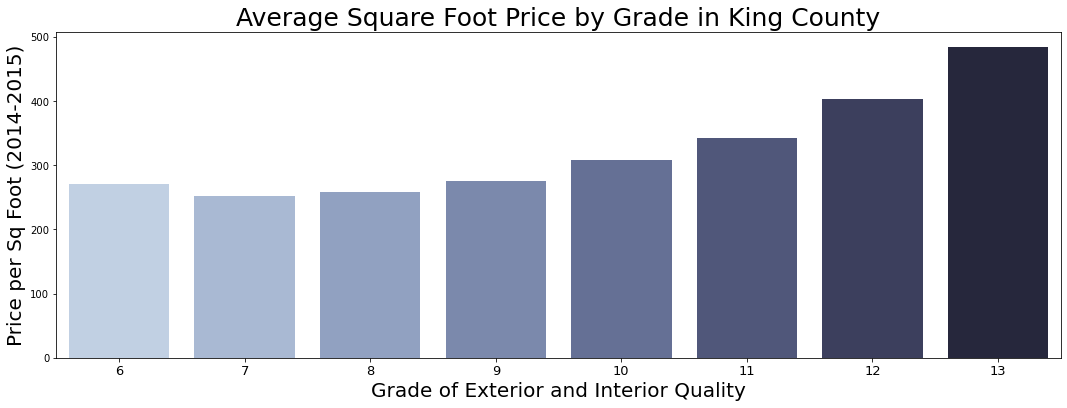

In [9]:
#by_grade_df=avg_zipcode_df.groupby('grade').mean().reset_index()[['grade','price','price_per_sqft']].sort_values(by='price_per_sqft', \
by_grade_df=df.groupby('grade').mean().reset_index()[['grade','price','price_per_sqft']].sort_values(by='price_per_sqft', \
                                                                                                        ascending=True)

fig, ax = plt.subplots(figsize=(18,6))


sns.barplot(x='grade', y='price_per_sqft', data=by_grade_df,
            order=by_grade_df.sort_values('grade')['grade'], palette="ch:r=-.1,l=.8")

pd.set_option('display.float_format', lambda x: '%.7f' % x)
#ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Average Square Foot Price by Grade in King County", size=25)
ax.set_ylabel("Price per Sq Foot (2014-2015)" , size=20)
ax.set_xlabel("Grade of Exterior and Interior Quality", size=20)

plt.xticks(fontsize=13 ) ;

fig.savefig('images/by_grade.png')


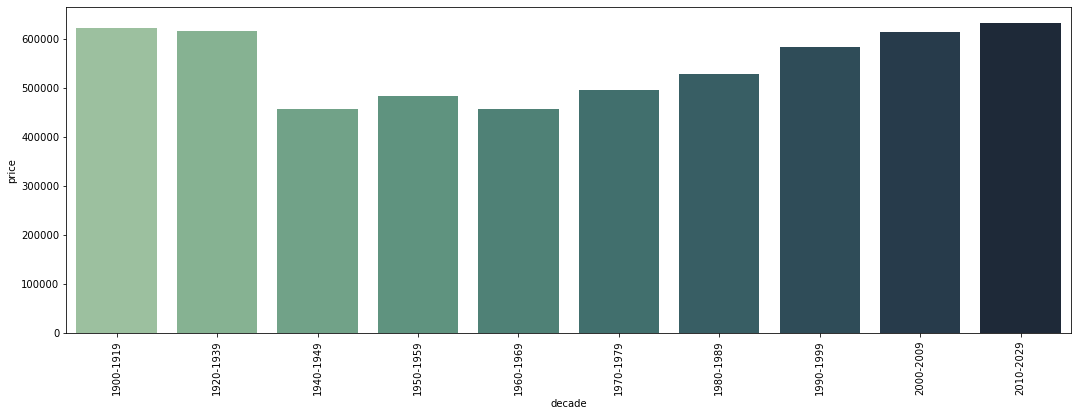

In [10]:

by_decade_df=df.groupby('decade').mean().reset_index()[['decade','price','price_per_sqft']].sort_values(by='price', \
                                                                                                     ascending=False)
fig, ax = plt.subplots(figsize=(18,6))

sns.barplot('decade', 'price', data=by_decade_df, order=by_decade_df.sort_values('decade')['decade'], palette="ch:r=-.5,l=.7")

plt.xticks(rotation=90);
#ax.set_xticklabels(size_labels,  rotation=80 )


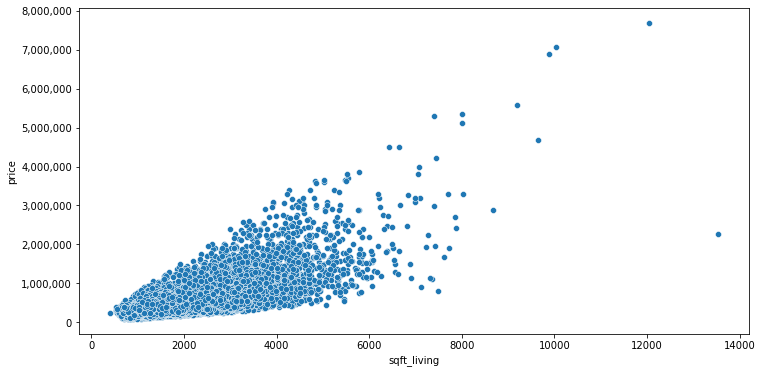

In [11]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot('sqft_living','price', data=df, ax=ax)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

<AxesSubplot:>

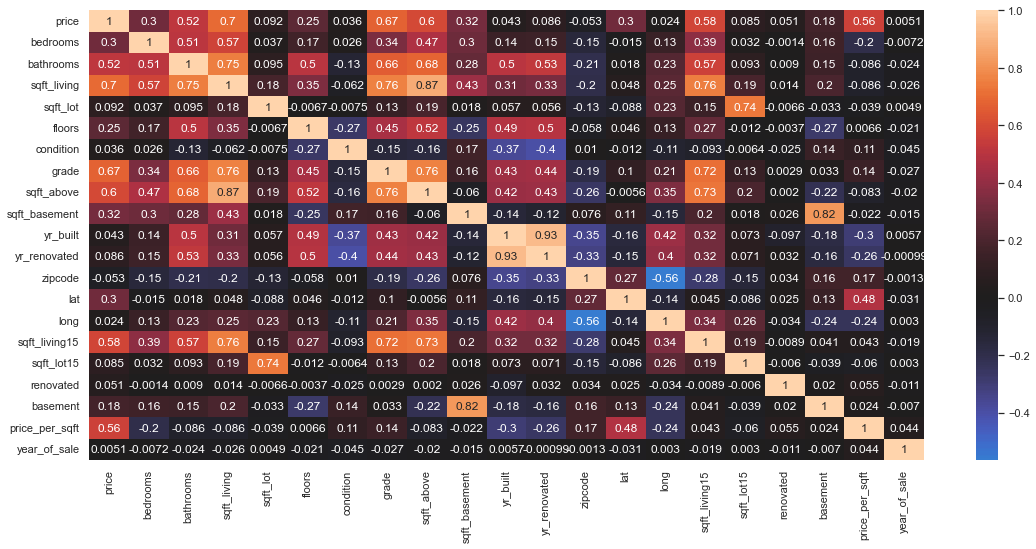

In [16]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.heatmap (df.drop(['date'], axis=1).corr(), annot=True, center=0)


# Comparing histograms before and after log transformation

In [28]:
initial_pred = df.drop(columns=["price"]).copy()
initial_price = df[["price"]]
pred_fin, price_fin = transform_data(initial_pred, initial_price)


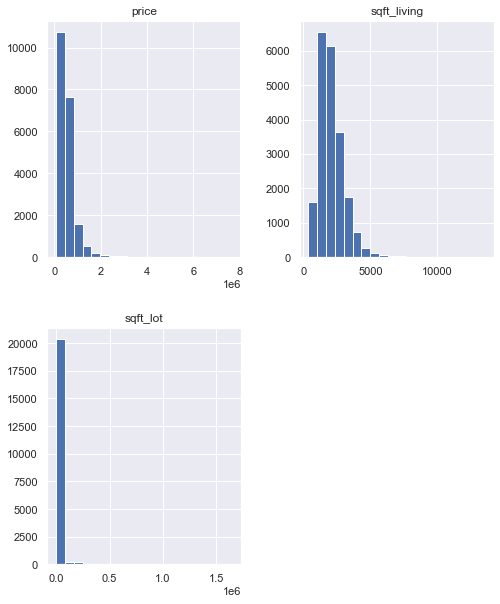

In [29]:

pd.concat([initial_price, initial_pred [['sqft_living','sqft_lot']]], axis=1).hist(figsize=(8,10), bins=20);

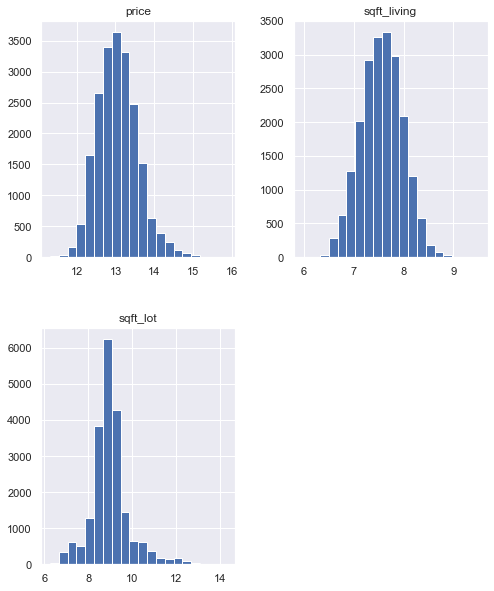

In [30]:
pd.concat([price_fin, pred_fin[['sqft_living','sqft_lot']]], axis=1).hist(figsize=(8,10), bins=20);